 # **<font color='blue'/>Importation des packages et chargement des données**

---



In [7]:
# pip install shap

In [8]:
# pip install imbalanced-learn

In [9]:
# pip install shapely

In [10]:
# pip install lightgbm

Importation des packages

In [97]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, LabelEncoder, LabelBinarizer
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score, classification_report, ConfusionMatrixDisplay

from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import lightgbm as lgbm

from sklearn.decomposition import PCA

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, LabelBinarizer

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector,ColumnTransformer

from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance

import shap
shap.initjs()

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import matplotlib as mpl

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import imblearn
from imblearn.over_sampling import SMOTE

from scipy.stats import kde

from sklearn.metrics import roc_curve
from matplotlib import pyplot
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from numpy import arange

import os,shutil
import cv2
from urllib import request
import glob
import pickle as pk
import re

import zipfile as zf
import tarfile

from PIL import Image
from IPython.core.display import display,HTML

chargement des données

In [12]:
# url="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Impl%C3%A9menter+un+mod%C3%A8le+de+scoring/Projet+Mise+en+prod+-+home-credit-default-risk.zip"
# request.urlretrieve (url, "Projet+Mise+en+prod+-+home-credit-default-risk.zip")

Dézipper le fichier zip contenant les données dans le dossier :

In [13]:
# with zf.ZipFile('Projet+Mise+en+prod+-+home-credit-default-risk.zip', 'r') as f:
#   f.extractall('Data')

Lire les fichiers csv importés, et les affecter à des DataFrames :

In [300]:
df_app_train             = pd.read_csv("Data/application_train.csv")
# # df_app_test              = pd.read_csv("Data/application_test.csv")
# df_bureau                = pd.read_csv("Data/bureau.csv")
# df_bureau_balance        = pd.read_csv("Data/bureau_balance.csv")
# df_credit_card_balance   = pd.read_csv("Data/credit_card_balance.csv")
# df_installments_payments = pd.read_csv("Data/installments_payments.csv")
# df_previous_application  = pd.read_csv("Data/previous_application.csv")
# df_POS_CASH_balance      = pd.read_csv("Data/POS_CASH_balance.csv")
# df_sample_submission     = pd.read_csv("Data/sample_submission.csv")

# **<font color='blue'/>Nettoyage des données**

---

## Exploration Data

In [ ]:
df_app_train.head()

In [ ]:
print("application_train -  rows:",df_app_train.shape[0]," columns:", df_app_train.shape[1])
print("application_test -  rows:",df_app_test.shape[0]," columns:", df_app_test.shape[1])
print("bureau -  rows:",df_bureau.shape[0]," columns:", df_bureau.shape[1])
print("bureau_balance -  rows:",df_bureau_balance.shape[0]," columns:", df_bureau_balance.shape[1])
print("credit_card_balance -  rows:",df_credit_card_balance.shape[0]," columns:", df_credit_card_balance.shape[1])
print("installments_payments -  rows:",df_installments_payments.shape[0]," columns:", df_installments_payments.shape[1])
print("previous_application -  rows:",df_previous_application.shape[0]," columns:", df_previous_application.shape[1])
print("POS_CASH_balance -  rows:",df_POS_CASH_balance.shape[0]," columns:", df_POS_CASH_balance.shape[1])
print("sample_submission -  rows:",df_sample_submission.shape[0]," columns:", df_sample_submission.shape[1])

In [ ]:
print(df_app_test.columns)
print(df_app_train.columns)
print(df_bureau.columns)

Comparer les colonnes des deux dataframes

In [ ]:
df_app_train.columns.equals(df_app_test.columns)

Comparer les colonnes 

In [ ]:
df1 = df_app_train.columns
df2 = df_app_test.columns

df1[~df1.isin(df2)].value_counts()

In [ ]:
df2[~df2.isin(df1)].value_counts()

## Bureau et Bureau Balance

**FUNCTIONS**

There are some useful functions in this section. They will help to understand the problem, exploratory data analysis, pre-processing and so on.

- Reduce Memory Usage
- One-Hot Encoder
- Finding column names and types
- An analyzer for Categorical Variables
- Plotting numerical variables
- Plotting correlations
- Finding high correlations
- Missing Value
- Quantile functions for aggregations
- Rare Encoder

In [2]:
# Reduce Memory Usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = df.select_dtypes(["category", "object"]).columns.tolist()
    # categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Grab Column Names
def grab_col_names(dataframe, cat_th=10, car_th=20, show_date=False):
    date_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "datetime64[ns]"]

    #cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    cat_cols = dataframe.select_dtypes(["object", "category"]).columns.tolist()
    
    
    
    num_but_cat = [col for col in dataframe.select_dtypes(["float", "integer"]).columns if dataframe[col].nunique() < cat_th]

    cat_but_car = [col for col in dataframe.select_dtypes(["object", "category"]).columns if dataframe[col].nunique() > car_th]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = dataframe.select_dtypes(["float", "integer"]).columns
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'date_cols: {len(date_cols)}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    if show_date == True:
        return date_cols, cat_cols, cat_but_car, num_cols, num_but_cat
    else:
        return cat_cols, cat_but_car, num_cols, num_but_cat

# Categorical Variables & Target
def cat_analyzer(dataframe, variable, target = None):
    print(variable)
    if target == None:
        print(pd.DataFrame({
            "COUNT": dataframe[variable].value_counts(),
            "RATIO": dataframe[variable].value_counts() / len(dataframe)}), end="\n\n\n")
    else:
        temp = dataframe[dataframe[target].isnull() == False]
        print(pd.DataFrame({
            "COUNT":dataframe[variable].value_counts(),
            "RATIO":dataframe[variable].value_counts() / len(dataframe),
            "TARGET_COUNT":dataframe.groupby(variable)[target].count(),
            "TARGET_MEAN":temp.groupby(variable)[target].mean(),
            "TARGET_MEDIAN":temp.groupby(variable)[target].median(),
            "TARGET_STD":temp.groupby(variable)[target].std()}), end="\n\n\n")

# Numerical Variables
def corr_plot(data, remove=["Id"], corr_coef = "pearson", figsize=(20, 20)):
    if len(remove) > 0:
        num_cols2 = [x for x in data.columns if (x not in remove)]

    sns.set(font_scale=1.1)
    c = data[num_cols2].corr(method = corr_coef)
    mask = np.triu(c.corr(method = corr_coef))
    plt.figure(figsize=figsize)
    sns.heatmap(c,
                annot=True,
                fmt='.1f',
                cmap='coolwarm',
                square=True,
                mask=mask,
                linewidths=1,
                cbar=False)
    plt.show()

# Plot numerical variables
def num_plot(data, num_cols, remove=["Id"], hist_bins=10, figsize=(20, 4)):

    if len(remove) > 0:
        num_cols2 = [x for x in num_cols if (x not in remove)]

    for i in num_cols2:
        fig, axes = plt.subplots(1, 3, figsize=figsize)
        data.hist(str(i), bins=hist_bins, ax=axes[0])
        data.boxplot(str(i), ax=axes[1], vert=False);
        try:
            sns.kdeplot(np.array(data[str(i)]))
        except:
            ValueError

        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(i + " | Histogram")
        axes[1].set_title(i + " | Boxplot")
        axes[2].set_title(i + " | Density")
        plt.show()

# Get high correlated variables
def high_correlation(data, remove=['SK_ID_CURR', 'SK_ID_BUREAU'], corr_coef="pearson", corr_value = 0.7):
    if len(remove) > 0:
        cols = [x for x in data.columns if (x not in remove)]
        c = data[cols].corr(method=corr_coef)
    else:
        c = data.corr(method=corr_coef)

    for i in c.columns:
        cr = c.loc[i].loc[(c.loc[i] >= corr_value) | (c.loc[i] <= -corr_value)].drop(i)
        if len(cr) > 0:
            print(i)
            print("-------------------------------")
            print(cr.sort_values(ascending=False))
            print("\n")

# Missing Value
def missing_values(data, plot=False):
    mst = pd.DataFrame(
        {"Num_Missing": data.isnull().sum(), "Missing_Ratio": data.isnull().sum() / data.shape[0]}).sort_values(
        "Num_Missing", ascending=False)
    mst["DataTypes"] = data[mst.index].dtypes.values
    mst = mst[mst.Num_Missing > 0].reset_index().rename({"index": "Feature"}, axis=1)

    print("Number of Variables include Missing Values:", mst.shape[0], "\n")

    if mst[mst.Missing_Ratio >= 0.3].shape[0] > 0:
        print("Full Missing Variables:", mst[mst.Missing_Ratio >= 1.0].Feature.tolist())
        data.drop(mst[mst.Missing_Ratio >= 1.0].Feature.tolist(), axis=1, inplace=True)

        print("Full missing variables are deleted!", "\n")

    if plot:
        plt.figure(figsize=(25, 8))
        p = sns.barplot(mst.Feature, mst.Missing_Ratio)
        for rotate in p.get_xticklabels():
            rotate.set_rotation(90)
        plt.show()

    print(mst, "\n")
    
    
# Quantile functions for aggregations
def quantile_funcs(percentiles = [0.75, 0.9, 0.99]):
    return [(p, lambda x: x.quantile(p)) for p in percentiles]

# Rare Encoder
def rare_encoder(data, col, rare_perc):
    temp = data[col].value_counts() / len(data) < rare_perc
    data[col] = np.where(~data[col].isin(temp[temp < rare_perc].index), "Rare", data[col])
    
    
    
# Plot of multiple features, with TARGET = 1/0 on the same graph
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = df_app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df_app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    
#     # Ajouter les annotations sur les barres
#     for p in s.patches:
#         width, height = p.get_width(), p.get_height()
#         x, y = p.get_xy()
#         plt.annotate("%.2f" % p.get_height() + '%',
#                     (p.get_x()+p.get_width()/2, p.get_height()),
#                     ha='center',
#                     va='center',
#                     xytext=(0, 8),
#                     textcoords='offset points',
#                     fontsize = 10,
#                     )

    plt.show();
    
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = df_train.loc[df_train['TARGET'] != 0]
    t0 = df_train.loc[df_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw_adjust=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw_adjust=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
#         client = df_train[feature][df_train['SK_ID_CURR'] == 100020].values[0]
#         plt.axvline(client, c='red')
        plt.legend()
    plt.show();

In [175]:
# data = df_train1.head(1000)
# rare_perc=0.4
# temp = data['CODE_GENDER'].value_counts() / len(data) < rare_perc
# data['CODE_GENDER'] = np.where(~data['CODE_GENDER'].isin(temp[temp < rare_perc].index), "Rare", data['CODE_GENDER'])

# data['CODE_GENDER'].value_counts()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1       647
Rare    353
Name: CODE_GENDER, dtype: int64

In [ ]:
df_bureau.columns

In [ ]:
df_bureau[df_bureau['SK_ID_CURR'].duplicated()].sort_values(by='SK_ID_CURR', ascending=True)

Let's merge df_app_train with df_bureau.

In [ ]:
print(df_app_train.shape)
print(df_bureau.shape)

In [ ]:
# print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ", 
#       application_bureau_train.shape[1]," columns.")

Nettoyage de df_Bureau_Balance

In [ ]:
# One-Hot Encoder
bb, bb_cat = one_hot_encoder(df_bureau_balance, nan_as_category=False)

# Bureau balance: Perform aggregations and merge with bureau.csv
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}

for col in bb_cat:
    bb_aggregations[col] = ['mean']

bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])

# Status Sum
bb_agg["STATUS_C0_MEAN_SUM"] = bb_agg[["STATUS_C_MEAN", "STATUS_0_MEAN"]].sum(axis = 1)
bb_agg["STATUS_12_MEAN_SUM"] = bb_agg[["STATUS_1_MEAN", "STATUS_2_MEAN"]].sum(axis = 1)
bb_agg["STATUS_345_MEAN_SUM"] = bb_agg[["STATUS_3_MEAN", "STATUS_4_MEAN", "STATUS_5_MEAN"]].sum(axis = 1)
bb_agg["STATUS_12345_MEAN_SUM"] = bb_agg[["STATUS_1_MEAN", "STATUS_2_MEAN", "STATUS_3_MEAN", 
                                          "STATUS_4_MEAN", "STATUS_5_MEAN"]].sum(axis = 1)

# Find the first month when the credit is closed!
closed = df_bureau_balance[df_bureau_balance.STATUS == "C"]
closed = closed.groupby("SK_ID_BUREAU").MONTHS_BALANCE.min().reset_index().rename({"MONTHS_BALANCE":"MONTHS_BALANCE_FIRST_C"}, axis = 1)
closed["MONTHS_BALANCE_FIRST_C"] = np.abs(closed["MONTHS_BALANCE_FIRST_C"])
bb_agg = pd.merge(bb_agg, closed, how = "left", on = "SK_ID_BUREAU")
bb_agg["MONTHS_BALANCE_CLOSED_DIF"] = np.abs(bb_agg.MONTHS_BALANCE_MIN) - bb_agg.MONTHS_BALANCE_FIRST_C

del closed, bb_aggregations, df_bureau_balance, bb_cat

In [ ]:
print("BURAU BALANCE SHAPE:", bb_agg.shape, "\n")

bb_agg.head()

In [ ]:
pd.set_option('display.max_columns', 500)

# bureau_agg[bureau_agg['SK_ID_CURR']==100001]
# df_bureau[df_bureau['SK_ID_BUREAU']==146896]
# df_bureau.tail(40)

In [ ]:
# df_bureau[df_bureau['SK_ID_CURR']==100001]

Merge Bureau Balance and Bureau

In [ ]:
# LEFT JOIN WITH BUREAU
bureau = pd.merge(df_bureau, bb_agg, how='left', on='SK_ID_BUREAU')
# del bb_agg

print(bureau.shape, "\n")

bureau.head()

Le taux de valeurs manquantes en % de bureau

In [ ]:
missing_rate = (bureau.isna().sum()/bureau.shape[0])*100
missing_rate

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='90', fontsize=14)
plt.title("Le taux de valeurs manquantes en % de bureau",fontsize=18)
# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

In [ ]:
# How many loans of each customer are there to from Credit Bureau?
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().hist(bins=50), plt.show()
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().agg({"min", "max", "mean", "median", "std"})

In [ ]:
pip install pyarrow

Manipulation de données de bureau

In [ ]:
# FEATURE ENGINEERING FOR BUREAU

# Categorical Variables
# -----------------------------------------------------------
# Useless
# bureau.drop("CREDIT_CURRENCY", axis = 1, inplace = True)

# Rare Categories
bureau["CREDIT_ACTIVE"] = np.where(bureau.CREDIT_ACTIVE.isin(["Sold", "Bad debt"]), "Sold_BadDebt", bureau.CREDIT_ACTIVE)

bureau["CREDIT_TYPE"] = np.where(
    ~bureau.CREDIT_TYPE.isin(
        ["Consumer credit", "Credit card", "Car loan", "Mortgage", "Microloan"]
    ), "Other", bureau["CREDIT_TYPE"])

# One-Hot Encoder
bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category=False)


# Numerical Variables
# -----------------------------------------------------------

# Bureau and bureau_balance numeric features
cal = ['min', 'max', 'mean', 'sum', 'median','std']
cols1 = [
    'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_CREDIT_UPDATE','CREDIT_DAY_OVERDUE',
    'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE',
    'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY', 'CNT_CREDIT_PROLONG', 'MONTHS_BALANCE_MIN',
    'MONTHS_BALANCE_MAX', 'MONTHS_BALANCE_SIZE', 'MONTHS_BALANCE_FIRST_C', 'MONTHS_BALANCE_CLOSED_DIF'
]

num_aggregations = {}


for i in cols1:
    num_aggregations[i] = cal
    
    
# Bureau and bureau_balance categorical features
cat_aggregations = {}

for i in bureau_cat:
    cat_aggregations[i] = ['mean']

cols2 = ['STATUS_0_MEAN', 'STATUS_1_MEAN', 'STATUS_2_MEAN', 'STATUS_3_MEAN', 'STATUS_4_MEAN',
        'STATUS_5_MEAN', 'STATUS_C_MEAN', 'STATUS_X_MEAN', 'STATUS_C0_MEAN_SUM',
        'STATUS_12_MEAN_SUM', 'STATUS_345_MEAN_SUM', 'STATUS_12345_MEAN_SUM']
for i in cols2:
    cat_aggregations[i] = ['mean', 'median', 'sum', 'max', 'std']

# del i, cols1, cols2, bureau_cat, cal
    
# Create aggregated data
bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
bureau_agg.columns = pd.Index(['BUREAU_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])


# New features
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().value_counts()
bcount = bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().reset_index().rename({"SK_ID_BUREAU":"BUREAU_COUNT"}, axis = 1)
bcount["BUREAU_COUNT_CAT"] = np.where(bcount.BUREAU_COUNT < 4, 0, 1)
bcount["BUREAU_COUNT_CAT"] = np.where((bcount.BUREAU_COUNT >= 8) & (bcount.BUREAU_COUNT < 13), 2, bcount["BUREAU_COUNT_CAT"])
bcount["BUREAU_COUNT_CAT"] = np.where((bcount.BUREAU_COUNT >= 13) & (bcount.BUREAU_COUNT < 20), 3, bcount["BUREAU_COUNT_CAT"])
bcount["BUREAU_COUNT_CAT"] = np.where((bcount.BUREAU_COUNT >= 20), 4, bcount["BUREAU_COUNT_CAT"])
bureau_agg = pd.merge(bureau_agg, bcount, how = "left", on = "SK_ID_CURR")
# del bcount


# Bureau: Active credits - using only numerical aggregations
active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
bureau_agg = pd.merge(bureau_agg, active_agg, how='left', on='SK_ID_CURR')
# del active, active_agg


# Bureau: Closed credits - using only numerical aggregations
closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
bureau_agg = pd.merge(bureau_agg, closed_agg, how='left', on='SK_ID_CURR')
# del closed, closed_agg

# Bureau: Sold and Bad Debt credits - using only numerical aggregations
sold_baddebt = bureau[bureau['CREDIT_ACTIVE_Sold_BadDebt'] == 1]
sold_baddebt_agg = sold_baddebt.groupby('SK_ID_CURR').agg(num_aggregations)
sold_baddebt_agg.columns = pd.Index(['SOLD_BADDEBT' + e[0] + "_" + e[1].upper() for e in sold_baddebt_agg.columns.tolist()])
bureau_agg = pd.merge(bureau_agg, sold_baddebt_agg, how='left', on='SK_ID_CURR')
# del sold_baddebt, sold_baddebt_agg, bureau

# del num_aggregations, cat_aggregations


# WRITE FEATHER
# bureau_agg.to_feather("bureau_bureaubalance_agg_feather")
#pd.read_feather("./bureau_bureaubalance_agg_feather")

print("BUREAU & BURAU BALANCE SHAPE:", bureau_agg.shape, "\n")

bureau_agg.head()

## POS CASH balance

Le taux de valeurs manquantes en %

In [ ]:
missing_rate = (df_POS_CASH_balance.isna().sum()/df_POS_CASH_balance.shape[0])*100
missing_rate

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(14,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='75', fontsize=18)
plt.title("Le taux de valeurs manquantes en % de POS CASH Balance",fontsize=18)
# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

In [ ]:
df_POS_CASH_balance

Nettoyage de données de df_POS_CASH_balance

In [ ]:
# Rare
df_POS_CASH_balance["NAME_CONTRACT_STATUS"] = np.where(~(df_POS_CASH_balance["NAME_CONTRACT_STATUS"].isin([
   "Active", "Completed"
])), "Rare", df_POS_CASH_balance["NAME_CONTRACT_STATUS"])

# One-Hot Encoder
df_POS_CASH_balance, cat_cols = one_hot_encoder(df_POS_CASH_balance, nan_as_category=False)

aggregations = {
    # Numerical
    'MONTHS_BALANCE': ['max', 'mean', 'size'],
    'CNT_INSTALMENT': ['max', 'mean', 'std', 'min', 'median'],
    'CNT_INSTALMENT_FUTURE': ['max', 'mean', 'sum', 'min', 'median', 'std'],
    'SK_DPD': ['max', 'mean'],
    'SK_DPD_DEF': ['max', 'mean']
}
# Categorical
for cat in cat_cols:
    aggregations[cat] = ['mean']

# Aggregation
df_POS_CASH_balance_agg = df_POS_CASH_balance.groupby('SK_ID_CURR').agg(aggregations)
df_POS_CASH_balance_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in df_POS_CASH_balance_agg.columns.tolist()])
# Count df_POS_CASH_balance cash accounts
df_POS_CASH_balance_agg['df_POS_CASH_balance_COUNT'] = df_POS_CASH_balance.groupby('SK_ID_CURR').size()
df_POS_CASH_balance_agg.reset_index(inplace = True)
del df_POS_CASH_balance

print("df_POS_CASH_balance CASH BALANCE SHAPE:", df_POS_CASH_balance_agg.shape, "\n")

df_POS_CASH_balance_agg.head()

## Credit Card Balance

Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) liés aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon # de cartes de crédit précédentes relatives # de mois où nous avons un historique observable pour les lignes de carte de crédit précédentes).

Le taux de valeurs manquantes en % df_credit_card_balance

In [ ]:
missing_rate = (df_credit_card_balance.isna().sum()/df_credit_card_balance.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='90', fontsize=14)
plt.title("Le taux de valeurs manquantes en % de credit_card_balance",fontsize=18)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

Nettoyage des données df_credit_card_balance

In [ ]:
# Rare
df_credit_card_balance["NAME_CONTRACT_STATUS"] = np.where(~(df_credit_card_balance["NAME_CONTRACT_STATUS"].isin([
   "Active", "Completed"
])), "Rare", df_credit_card_balance["NAME_CONTRACT_STATUS"])

# One Hot Encoder
df_credit_card_balance, cat_cols = one_hot_encoder(df_credit_card_balance, nan_as_category=False)

# General aggregations
df_credit_card_balance.drop(['SK_ID_PREV'], axis=1, inplace=True)
df_credit_card_balance_agg = df_credit_card_balance.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'std'])
df_credit_card_balance_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in df_credit_card_balance_agg.columns.tolist()])
# Count credit card lines
df_credit_card_balance_agg['df_credit_card_balance_COUNT'] = df_credit_card_balance.groupby('SK_ID_CURR').size()
df_credit_card_balance_agg.reset_index(inplace = True)
del df_credit_card_balance

print("CREDIT CARD BALANCE SHAPE:", df_credit_card_balance_agg.shape, "\n")

df_credit_card_balance_agg.head()

## Installments Payments

Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon. Il y a :

-  une ligne pour chaque paiement effectué plus 
-  une ligne pour chaque paiement manqué. Une ligne équivaut à un versement d'une échéance ou une échéance correspondant à un versement d'un précédent crédit immobilier lié aux crédits de notre échantillon.

Le taux de valeurs manquantes en % df_credit_card_balance

In [ ]:
missing_rate = (df_installments_payments.isna().sum()/df_installments_payments.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='75', fontsize=14)
plt.title("Le taux de valeurs manquantes en % - installments payments",fontsize=18)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

In [ ]:
# Percentage and difference paid in each installment (amount paid and installment value)
df_installments_payments['PAYMENT_PERC'] = df_installments_payments['AMT_PAYMENT'] / df_installments_payments['AMT_INSTALMENT']
df_installments_payments['PAYMENT_DIFF'] = df_installments_payments['AMT_INSTALMENT'] - df_installments_payments['AMT_PAYMENT']
# Days past due and days before due (no negative values)
df_installments_payments['DPD'] = df_installments_payments['DAYS_ENTRY_PAYMENT'] - df_installments_payments['DAYS_INSTALMENT']
df_installments_payments['DBD'] = df_installments_payments['DAYS_INSTALMENT'] - df_installments_payments['DAYS_ENTRY_PAYMENT']
df_installments_payments['DPD'] = df_installments_payments['DPD'].apply(lambda x: x if x > 0 else 0)
df_installments_payments['DBD'] = df_installments_payments['DBD'].apply(lambda x: x if x > 0 else 0)
# Features: Perform aggregations
aggregations = {
    'NUM_INSTALMENT_VERSION': ['nunique'],
    'NUM_INSTALMENT_NUMBER': ['max', 'mean', 'sum', 'median', 'std'],
    'DAYS_INSTALMENT': ['max', 'mean', 'sum', 'median', 'std'],
    'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum', 'median', 'std'],
    'AMT_INSTALMENT': ['max', 'mean', 'sum', 'median', 'std'],
    'AMT_PAYMENT': ['min', 'max', 'mean', 'sum', 'median', 'std'],
    'DPD': ['max', 'mean', 'sum', 'median', 'std'],
    'DBD': ['max', 'mean', 'sum', 'median', 'std'],
    'PAYMENT_PERC': ['max', 'mean', 'sum', 'std', 'median'],
    'PAYMENT_DIFF': ['max', 'mean', 'sum', 'std', 'median']
}

df_installments_payments_agg = df_installments_payments.groupby('SK_ID_CURR').agg(aggregations)
df_installments_payments_agg.columns = pd.Index(['INS_' + e[0] + "_" + e[1].upper() for e in df_installments_payments_agg.columns.tolist()])
# Count installments accounts
df_installments_payments_agg['INS_COUNT'] = df_installments_payments.groupby('SK_ID_CURR').size()

df_installments_payments_agg.reset_index(inplace = True)
del df_installments_payments



print("INSTALLMENTS PAYMENTS SHAPE:", df_installments_payments_agg.shape, "\n")

df_installments_payments_agg.head()

In [ ]:
# df_installments_payments_agg.reset_index(drop=True)
# df_installments_payments_agg.to_csv('df_installments_payments_agg.csv', index = False)

## Previous Applications

- Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.
- Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

Le taux de valeurs manquantes en % df_previous_application

In [ ]:
missing_rate = (df_previous_application.isna().sum()/df_previous_application.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='90', fontsize=14)
plt.title("Le taux de valeurs manquantes en % - installments payments",fontsize=18)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

Nettoyage des données de df_previous_application

In [ ]:
# Rare Encoder
rare_cols = [
    "NAME_PAYMENT_TYPE", "CODE_REJECT_REASON", "CHANNEL_TYPE", "NAME_GOODS_CATEGORY",
    "NAME_SELLER_INDUSTRY", "NAME_TYPE_SUITE"
]

for i in rare_cols:
    rare_encoder(df_previous_application, i, rare_perc = 0.01)

df_previous_application["NAME_CASH_LOAN_PURPOSE"] = np.where(~df_previous_application["NAME_CASH_LOAN_PURPOSE"].isin(["XAP", "XNA"]), "Other", df_previous_application["NAME_CASH_LOAN_PURPOSE"])

rare_encoder(df_previous_application, "NAME_PORTFOLIO", rare_perc = 0.1) 

# Cash, Pos, Card
df_previous_application["PRODUCT_COMBINATION_CATS"] = np.where(df_previous_application["PRODUCT_COMBINATION"].str.contains("Cash"), "CASH", "POS")
df_previous_application["PRODUCT_COMBINATION_CATS"] = np.where(df_previous_application["PRODUCT_COMBINATION"].str.contains("Card"), "CARD", df_previous_application["PRODUCT_COMBINATION_CATS"])
# New categorical variables
df_previous_application["PRODUCT_COMBINATION_POS_WITH"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("without"))), "WITHOUT", "OTHER")
df_previous_application["PRODUCT_COMBINATION_POS_WITH"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("with interest"))), "WITH", df_previous_application["PRODUCT_COMBINATION_POS_WITH"])
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("household"))), "household", "OTHER")
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("industry"))), "industry", df_previous_application["PRODUCT_COMBINATION_POS_TYPE"])
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("mobile"))), "mobile", df_previous_application["PRODUCT_COMBINATION_POS_TYPE"])
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("other"))), "posother", df_previous_application["PRODUCT_COMBINATION_POS_TYPE"])
df_previous_application["PRODUCT_COMBINATION_CASH_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("Cash") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("X-Sell"))), "xsell", "OTHER")
df_previous_application["PRODUCT_COMBINATION_CASH_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("Cash") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("Street"))), "street", df_previous_application["PRODUCT_COMBINATION_CASH_TYPE"])


# Useless
df_previous_application.drop(["WEEKDAY_APPR_PROCESS_START", "FLAG_LAST_APPL_PER_CONTRACT", "NFLAG_LAST_APPL_IN_DAY", "NFLAG_LAST_APPL_IN_DAY"], axis = 1, inplace = True)

# One-Hot Encoder
df_previous_application, cat_cols = one_hot_encoder(df_previous_application, nan_as_category=True)


# Days 365.243 values -> nan
df_previous_application['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

# Add feature: value ask / value received percentage
df_previous_application['APP_CREDIT_PERC'] = df_previous_application['AMT_APPLICATION'] / df_previous_application['AMT_CREDIT']


# Previous Applications numeric features
num_aggregations = {
    'AMT_ANNUITY': ['min', 'max', 'mean', "median", "std"],
    'AMT_APPLICATION': ['min', 'max', 'mean', "median", "std"],
    'AMT_CREDIT': ['min', 'max', 'mean', "median", "std"],
    'APP_CREDIT_PERC': ['min', 'max', 'mean', "median", "std"],
    'AMT_DOWN_PAYMENT': ['min', 'max', 'mean', "median", "std"],
    'AMT_GOODS_PRICE': ['min', 'max', 'mean', "median", "std"],
    'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean', "median", "std"],
    'RATE_DOWN_PAYMENT': ['min', 'max', 'mean', "std"],
    'RATE_INTEREST_PRIMARY': ['min', 'max', 'mean', "std"],
    'RATE_INTEREST_PRIVILEGED': ['min', 'max', 'mean', "std"],
    'DAYS_DECISION': ['min', 'max', 'mean', "median", "std"],
    'CNT_PAYMENT': ['mean', 'sum', "median", "std"],
    'SELLERPLACE_AREA': ['min', 'max', 'mean', "median", "std"],
    'DAYS_FIRST_DRAWING': ['min', 'max', 'mean', "median", "std"],
    'DAYS_FIRST_DUE': ['min', 'max', 'mean', "median", "std"],
    'DAYS_LAST_DUE_1ST_VERSION': ['min', 'max', 'mean', "median", "std"],
    'DAYS_LAST_DUE': ['min', 'max', 'mean', "median", "std"],
    'DAYS_TERMINATION': ['min', 'max', 'mean', "median", "std"],
    # Categorical
    "NFLAG_INSURED_ON_APPROVAL": ["mean"]
}
# Previous Applications categorical features
cat_aggregations = {}
for cat in cat_cols:
    cat_aggregations[cat] = ['mean']

df_previous_application_agg = df_previous_application.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
df_previous_application_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in df_previous_application_agg.columns.tolist()])

# Previous Applications: Approved Applications - only numerical features
approved = df_previous_application[df_previous_application['NAME_CONTRACT_STATUS_Approved'] == 1]
approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
df_previous_application_agg = pd.merge(df_previous_application_agg,approved_agg, how='left', on='SK_ID_CURR')

# Previous Applications: Refused Applications - only numerical features
refused = df_previous_application[df_previous_application['NAME_CONTRACT_STATUS_Refused'] == 1]
refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
df_previous_application_agg = pd.merge(df_previous_application_agg, refused_agg, how='left', on='SK_ID_CURR')

del refused, refused_agg, approved, approved_agg
df_previous_application_agg.reset_index(inplace = True)


print("PREVIOUS APPLICATIONS SHAPE:", df_previous_application_agg.shape, "\n")

df_previous_application_agg.head()

In [ ]:
# df_previous_application_agg.reset_index(drop=True)
# df_previous_application_agg.to_csv('df_previous_application_agg.csv', index = False)

## Application Train/Test

- Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
- Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.

Le taux de valeurs manquantes en % df_previous_application

In [ ]:
missing_rate = (df_app_train.isna().sum()/df_app_train.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
missing_rate

In [ ]:
df_app_train[df_app_train.CODE_GENDER.str.contains("XNA")]

In [ ]:
df_app_train.NAME_FAMILY_STATUS.unique()

In [ ]:
df_app_train[df_app_train.NAME_FAMILY_STATUS.str.contains("Unknown")]

Suppression des colonnes non pértinentes

In [ ]:
# ERRORS
df_app_train = df_app_train[~(df_app_train.CODE_GENDER.str.contains("XNA"))]  
df_app_train = df_app_train[df_app_train.NAME_FAMILY_STATUS != "Unknown"]  

# DROP
cols = ["NAME_HOUSING_TYPE", "WEEKDAY_APPR_PROCESS_START", "FONDKAPREMONT_MODE", "WALLSMATERIAL_MODE", "HOUSETYPE_MODE",
        "EMERGENCYSTATE_MODE","FLAG_MOBIL", "FLAG_EMP_PHONE","FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL"]
df_app_train.drop(cols, axis = 1, inplace = True)

# REGION
cols = ["REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY",
 "REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"]
df_app_train["REGION"] = df_app_train[cols].sum(axis = 1)
df_app_train.drop(cols, axis = 1, inplace = True)

# Drop FLAG_DOCUMENT 
df_app_train.drop(df_app_train.columns[df_app_train.columns.str.contains("FLAG_DOCUMENT")], axis = 1, inplace = True)

In [ ]:
# RARE ENCODER
df_app_train["NAME_EDUCATION_TYPE"] = np.where(df_app_train.NAME_EDUCATION_TYPE == "Academic degree", "Higher education", df_app_train.NAME_EDUCATION_TYPE)


df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.str.contains("Business Entity"), "Business Entity", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.str.contains("Industry"), "Industry", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.str.contains("Trade"), "Trade", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.str.contains("Transport"), "Transport", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["School", "Kindergarten", "University"]), "Education", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["Emergency","Police", "Medicine","Goverment", "Postal", "Military", "Security Ministries", "Legal Services"]), "Public", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["Bank", "Insurance"]), "Finance", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["Realtor", "Housing"]), "House", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["Hotel", "Restaurant"]), "HotelRestaurant", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["Cleaning","Electricity", "Telecom", "Mobile", "Advertising", "Religion", "Culture"]), "Other", df_app_train.ORGANIZATION_TYPE)

df_app_train["OCCUPATION_TYPE"] = np.where(df_app_train.OCCUPATION_TYPE.isin(["Low-skill Laborers", "Cooking staff", "Security staff", "Private service staff", "Cleaning staff", "Waiters/barmen staff"]), "Low-skill Laborers", df_app_train.OCCUPATION_TYPE)
df_app_train["OCCUPATION_TYPE"] = np.where(df_app_train.OCCUPATION_TYPE.isin(["IT staff", "High skill tech staff"]), "High skill tech staff", df_app_train.OCCUPATION_TYPE)


rare_cols = ["NAME_TYPE_SUITE", "NAME_INCOME_TYPE"]

for i in rare_cols:
    rare_encoder(df_app_train, i, rare_perc = 0.01)

    
# Categorical features with Binary encode (0 or 1; two categories)
for bin_feature in ["NAME_CONTRACT_TYPE", 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    df_app_train[bin_feature], uniques = pd.factorize(df_app_train[bin_feature])
    
    
# Categorical features with One-Hot encode
df_app_train, cat_cols = one_hot_encoder(df_app_train, nan_as_category=False)


# NaN values for DAYS_EMPLOYED: 365.243 -> nan
df_app_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

# Some simple new features (percentages)
df_app_train['DAYS_EMPLOYED_PERC'] = df_app_train['DAYS_EMPLOYED'] / df_app_train['DAYS_BIRTH']
df_app_train['INCOME_CREDIT_PERC'] = df_app_train['AMT_INCOME_TOTAL'] / df_app_train['AMT_CREDIT']
df_app_train['INCOME_PER_PERSON'] = df_app_train['AMT_INCOME_TOTAL'] / df_app_train['CNT_FAM_MEMBERS']
df_app_train['ANNUITY_INCOME_PERC'] = df_app_train['AMT_ANNUITY'] / df_app_train['AMT_INCOME_TOTAL']
df_app_train['PAYMENT_RATE'] = df_app_train['AMT_ANNUITY'] / df_app_train['AMT_CREDIT']


# EXT SOURCE MEAN FROM OTHER ASSOCIATIONS 
df_app_train["NEW_EXT_MEAN"] = df_app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
df_app_train['NEW_APP_EXT_SOURCES_PROD'] = df_app_train['EXT_SOURCE_1'] * df_app_train['EXT_SOURCE_2'] * df_app_train['EXT_SOURCE_3']

# Satın alınacak ürünün toplam kredi tutarına oranı
df_app_train["NEW_GOODS_CREDIT"] = df_app_train["AMT_GOODS_PRICE"] / df_app_train["AMT_CREDIT"]

# Kredinin yıllık ödemesinin müşterinin toplam gelirine oranı
df_app_train['NEW_ANNUITY_INCOME_PERC'] = df_app_train['AMT_ANNUITY'] / df_app_train['AMT_INCOME_TOTAL']

# Ürün ile kredi ile  arasındaki farkın toplam yıllık gelire oranı
df_app_train["NEW_C_GP"] = (df_app_train["AMT_GOODS_PRICE"] - df_app_train["AMT_CREDIT"]) / df_app_train["AMT_INCOME_TOTAL"]


# Başvuru sırasında müşterinin gün cinsinden yaşı eksili olarak verilmiş
# -1 ile çarpıp 365'e böldüğümüzde kaç yaşında olduğunu buluyoruz

df_app_train["NEW_APP_AGE"] = round(df_app_train["DAYS_BIRTH"] * -1 / 365)

df_app_train['NEW_INCOME_PER_PERSON'] = df_app_train['AMT_INCOME_TOTAL'] / df_app_train['CNT_FAM_MEMBERS']
df_app_train['NEW_PAYMENT_RATE'] = df_app_train['AMT_ANNUITY'] / df_app_train['AMT_CREDIT']

# kredinin çekildiği ürünün fiyatı / kredi miktarı
df_app_train["NEW_APP_GOODS/AMT_CREDIT"] = df_app_train["AMT_GOODS_PRICE"] / df_app_train["AMT_CREDIT"]

df_app_train['NEW_LOAN_VALUE_RATIO'] = df_app_train['AMT_CREDIT'] / df_app_train['AMT_GOODS_PRICE']

df_app_train['NEW_DAYS_EMPLOYED_PERC'] = df_app_train['DAYS_EMPLOYED'] / df_app_train['DAYS_BIRTH']
df_app_train['NEW_ANNUITY_INCOME_PERC'] = df_app_train['AMT_ANNUITY'] / df_app_train['AMT_INCOME_TOTAL']

df_app_train['NEW_INCOME_PER_PERSON_PERC_PAYMENT_RATE_INCOME_PER_PERSON'] = df_app_train['NEW_INCOME_PER_PERSON'] / df_app_train['NEW_PAYMENT_RATE']

print("APPLICATION TRAIN/TEST SHAPE:", df_app_train.shape, "\n")
df_app_train.head()

In [ ]:
df_app_train.shape

Vérifier les lignes dupliquées de df_app_train

In [ ]:
len(df_app_train[df_app_train['SK_ID_CURR'].duplicated()].sort_values(by='SK_ID_CURR', ascending=True))

## Fusionner les dataframes nettoyées

Fusionner df_app_train et bureau_agg

In [ ]:
df_train = pd.merge(df_app_train, bureau_agg, how='left', on='SK_ID_CURR')

del df_app_train, bureau_agg

print(df_train.shape, "\n")

df_train.head()

In [ ]:
# Supprimer les colonnes en doublon
# df_train.drop_duplicates(subset =df_train.columns, keep = False, inplace = True) 

Fusionner df_train et df_POS_CASH_balance_agg

In [ ]:
df_train = pd.merge(df_train, df_POS_CASH_balance_agg, how='left', on='SK_ID_CURR')

del df_POS_CASH_balance_agg

print(df_train.shape, "\n")

df_train.head()

In [ ]:
# df_train.reset_index(drop=True)
# df_train.to_csv('df_train.csv', index = False)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# df_train = pd.read_csv("df_train.csv")
# df_installments_payments_agg = pd.read_csv("df_installments_payments_agg.csv")
# df_previous_application_agg = pd.read_csv("df_previous_application_agg.csv")

Fusionner df_train et df_installments_payments_agg

In [ ]:
df_train = pd.merge(df_train, df_installments_payments_agg, how='left', on='SK_ID_CURR')

del df_installments_payments_agg

print(df_train.shape, "\n")

df_train.head()

Fusionner df_train et df_previous_application_agg

In [ ]:
df_train = pd.merge(df_train, df_previous_application_agg, how='left', on='SK_ID_CURR')

del df_previous_application_agg

print(df_train.shape, "\n")

df_train.head()

In [ ]:
df_train.shape

Supprimer les colonnes avec 30% de valeurs manquantes

In [ ]:
index_names = (((df_train.isna().sum()/df_train.shape[0])*100))
df_train.drop(index_names[index_names>30].index, inplace=True, axis=1)

In [ ]:
df_train = reduce_mem_usage(df_train)

In [ ]:
df_train.reset_index(drop=True)
df_train.to_csv('df_train.csv', index = False)

In [4]:
df_train = pd.read_csv("df_train.csv")

# **<font color='blue'/>Analyse exploratoire des données**

---


**TARGET** :

- **1** : client en difficulté de paiement : il a eu un retard de paiement de plus de X jours sur au moins une des Y premières échéances du crédit de notre échantillon

- **0** : tous les autres cas.

In [ ]:
temp = df_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': (temp.values/temp.sum())*100
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
ax = sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate("%.2f" % p.get_height() + '%',
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )
plt.show()

Sexe du client

Graphique séparé, le pourcentage des prêts (par sexe du client) avec la valeur CIBLE 1 (prêt non remboursé).

In [ ]:
plot_stats('CODE_GENDER')

Client avec ou sans voiture ou bien immobilier

- Graphique qui indiquent si un client possède une voiture ou un bien immobilier 
- Graphique qui indiquent si un client possède une voiture ou un bien immobilier pour la cible 1

In [ ]:
plot_stats('NAME_CONTRACT_TYPE')

In [ ]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

In [ ]:
plot_stats('NAME_FAMILY_STATUS',True, True)

In [ ]:
plot_stats('CNT_CHILDREN')

In [ ]:
plot_stats('CNT_FAM_MEMBERS',True)

In [ ]:
plot_stats('NAME_INCOME_TYPE',False,False)

In [ ]:
# plot_stats('OCCUPATION_TYPE',True, False)
plot_stats('ORGANIZATION_TYPE',True, False)

In [ ]:
plot_stats('NAME_EDUCATION_TYPE',True)

In [ ]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(var,nrow=3)

# **<font color='blue'/>Transformation et encodage des données**

---

Encoder les colonnes catégorielles

In [ ]:
# One-Hot Encoder
# df_train, df_train_cat = one_hot_encoder(df_train, nan_as_category=False)

Supprimer les caractères spéciaux des noms des colonnes

In [27]:
df_train = df_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', ' ', x))

In [28]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,APPROVED_DAYS_LAST_DUE_1ST_VERSION_MEDIAN,APPROVED_DAYS_LAST_DUE_MIN,APPROVED_DAYS_LAST_DUE_MAX,APPROVED_DAYS_LAST_DUE_MEAN,APPROVED_DAYS_LAST_DUE_MEDIAN,APPROVED_DAYS_TERMINATION_MIN,APPROVED_DAYS_TERMINATION_MAX,APPROVED_DAYS_TERMINATION_MEAN,APPROVED_DAYS_TERMINATION_MEDIAN,APPROVED_NFLAG_INSURED_ON_APPROVAL_MEAN
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,...,125.0,-25.0,-25.0,-25.0,-25.0,-17.0,-17.0,-17.0,-17.0,0.000000
1,100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,...,-647.0,-1980.0,-536.0,-1054.0,-647.0,-1976.0,-527.0,-1047.0,-639.0,0.666504
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,...,-694.0,-724.0,-724.0,-724.0,-724.0,-714.0,-714.0,-714.0,-714.0,0.000000
3,100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,...,49.0,-425.0,-151.0,-288.0,-288.0,-416.0,-143.0,-279.5,-279.5,0.000000
4,100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,...,-746.0,-2056.0,-354.0,-1140.0,-1076.0,-2041.0,-347.0,-1131.0,-1068.0,0.600098


In [29]:
df_train.shape

(307505, 585)

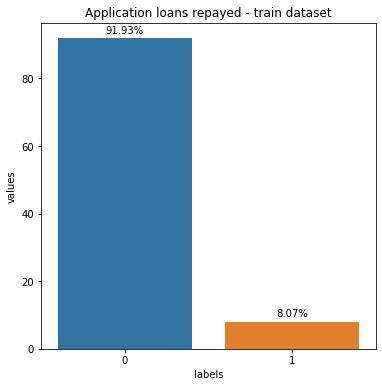

In [30]:
temp = df_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': (temp.values/temp.sum())*100
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
ax = sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate("%.2f" % p.get_height() + '%',
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )
plt.show()

Utiliser la classe SimpleImputer pour ajuster et transformer les données comme suit :

In [31]:
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

# imputer = imp_mean.fit([df_train])

# data_train = imputer.transform([df_train])

# print(data_train)

In [32]:
print(np.any(np.isnan(df_train)))

True


In [33]:
missing_values(df_train, plot=False)

Number of Variables include Missing Values: 515 

                           Feature  Num_Missing  Missing_Ratio DataTypes
0        ACTIVE_AMT_CREDIT_SUM_MIN        90361       0.293852   float32
1        ACTIVE_AMT_CREDIT_SUM_MAX        90361       0.293852   float32
2       ACTIVE_AMT_CREDIT_SUM_MEAN        90361       0.293852   float32
3     ACTIVE_AMT_CREDIT_SUM_MEDIAN        90361       0.293852   float32
4    ACTIVE_CNT_CREDIT_PROLONG_MIN        90360       0.293849   float16
..                             ...          ...            ...       ...
510        NEW_ANNUITY_INCOME_PERC           12       0.000039   float16
511                   PAYMENT_RATE           12       0.000039   float16
512               NEW_PAYMENT_RATE           12       0.000039   float16
513            ANNUITY_INCOME_PERC           12       0.000039   float16
514         DAYS_LAST_PHONE_CHANGE            1       0.000003   float16

[515 rows x 4 columns] 



In [34]:
df_train.shape
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,APPROVED_DAYS_LAST_DUE_1ST_VERSION_MEDIAN,APPROVED_DAYS_LAST_DUE_MIN,APPROVED_DAYS_LAST_DUE_MAX,APPROVED_DAYS_LAST_DUE_MEAN,APPROVED_DAYS_LAST_DUE_MEDIAN,APPROVED_DAYS_TERMINATION_MIN,APPROVED_DAYS_TERMINATION_MAX,APPROVED_DAYS_TERMINATION_MEAN,APPROVED_DAYS_TERMINATION_MEDIAN,APPROVED_NFLAG_INSURED_ON_APPROVAL_MEAN
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,...,125.0,-25.0,-25.0,-25.0,-25.0,-17.0,-17.0,-17.0,-17.0,0.000000
1,100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,...,-647.0,-1980.0,-536.0,-1054.0,-647.0,-1976.0,-527.0,-1047.0,-639.0,0.666504
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,...,-694.0,-724.0,-724.0,-724.0,-724.0,-714.0,-714.0,-714.0,-714.0,0.000000
3,100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,...,49.0,-425.0,-151.0,-288.0,-288.0,-416.0,-143.0,-279.5,-279.5,0.000000
4,100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,...,-746.0,-2056.0,-354.0,-1140.0,-1076.0,-2041.0,-347.0,-1131.0,-1068.0,0.600098


compter les valeurs infinies

In [35]:
count = np.isinf(df_train).values.sum()
count

27

Copier df_train

In [7]:
df_train1 = df_train.copy()

In [37]:
df_train1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'APPROVED_DAYS_LAST_DUE_1ST_VERSION_MEDIAN',
       'APPROVED_DAYS_LAST_DUE_MIN', 'APPROVED_DAYS_LAST_DUE_MAX',
       'APPROVED_DAYS_LAST_DUE_MEAN', 'APPROVED_DAYS_LAST_DUE_MEDIAN',
       'APPROVED_DAYS_TERMINATION_MIN', 'APPROVED_DAYS_TERMINATION_MAX',
       'APPROVED_DAYS_TERMINATION_MEAN', 'APPROVED_DAYS_TERMINATION_MEDIAN',
       'APPROVED_NFLAG_INSURED_ON_APPROVAL_MEAN'],
      dtype='object', length=585)

afficher l'index des lignes avce des valeurs inf

In [8]:
# printing row index with infinity
print()
print("printing row index with infinity ")
  
r = df_train1.index[np.isinf(df_train1).any(1)]
print(len(r))


printing row index with infinity 
19


In [39]:
df_train1['INS_PAYMENT_PERC_MAX'][df_train1['INS_PAYMENT_PERC_MAX'].index==5687]

5687    inf
Name: INS_PAYMENT_PERC_MAX, dtype: float64

Remplacer les valeurs infinies par 0

In [9]:
# printing column name where infinity is present
print("printing column name where infinity is present")
col_name = df_train1.columns.to_series()[np.isinf(df_train1).any()]
print(col_name)
# df_train1.drop(columns=np.array(col_name), inplace=True)
# Remplacer les valeurs infinies avec 0
df_train1.replace([np.inf, -np.inf], 0, inplace=True)

df_train1.shape

printing column name where infinity is present
INS_PAYMENT_PERC_MAX            INS_PAYMENT_PERC_MAX
INS_PAYMENT_PERC_MEDIAN      INS_PAYMENT_PERC_MEDIAN
PREV_APP_CREDIT_PERC_MAX    PREV_APP_CREDIT_PERC_MAX
dtype: object


(307505, 585)

In [41]:
df_train1['INS_PAYMENT_PERC_MAX'][df_train1['INS_PAYMENT_PERC_MAX'].index==5687]

5687    0.0
Name: INS_PAYMENT_PERC_MAX, dtype: float64

In [10]:
# printing row index with infinity
print()
print("printing row index with infinity ")
  
r = df_train1.index[np.isinf(df_train1).any(1)]
print(r)


printing row index with infinity 
Int64Index([], dtype='int64')


In [43]:
df_train1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,APPROVED_DAYS_LAST_DUE_1ST_VERSION_MEDIAN,APPROVED_DAYS_LAST_DUE_MIN,APPROVED_DAYS_LAST_DUE_MAX,APPROVED_DAYS_LAST_DUE_MEAN,APPROVED_DAYS_LAST_DUE_MEDIAN,APPROVED_DAYS_TERMINATION_MIN,APPROVED_DAYS_TERMINATION_MAX,APPROVED_DAYS_TERMINATION_MEAN,APPROVED_DAYS_TERMINATION_MEDIAN,APPROVED_NFLAG_INSURED_ON_APPROVAL_MEAN
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,...,125.0,-25.0,-25.0,-25.0,-25.0,-17.0,-17.0,-17.0,-17.0,0.000000
1,100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,...,-647.0,-1980.0,-536.0,-1054.0,-647.0,-1976.0,-527.0,-1047.0,-639.0,0.666504
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,...,-694.0,-724.0,-724.0,-724.0,-724.0,-714.0,-714.0,-714.0,-714.0,0.000000
3,100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,...,49.0,-425.0,-151.0,-288.0,-288.0,-416.0,-143.0,-279.5,-279.5,0.000000
4,100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,...,-746.0,-2056.0,-354.0,-1140.0,-1076.0,-2041.0,-347.0,-1131.0,-1068.0,0.600098


In [45]:
# define imputer
# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# imputer = KNNImputer(n_neighbors=5)

In [46]:
# df_imputed = pd.DataFrame(imputer.fit_transform(df_train1), columns = df_train1.columns)

# imputed = imputer.fit_transform(df_train)
# df_imputed = pd.DataFrame(imputed, columns=df_train.columns)

In [47]:
# df_imputed.shape

In [48]:
# df_imputed.to_csv('df_imputed.csv', index = False)

In [49]:
# df_imputed1 = df_imputed.copy() 

In [50]:
pd.set_option('display.max_columns', 500)

Nombre de valeurs manquantes

In [51]:
print('Missing value: %d' % sum(df_train1.isna().sum()))

Missing value: 18433771


Traiter les valeurs manquantes

In [11]:
# Initialiser SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Affecter les colonnes avec les valeurs manquantes
col_nan = df_train1.columns[df_train1.isnull().any()].values

# X = imputer.fit_transform(df_train1)
df_train1[col_nan] = imputer.fit_transform(df_train1[col_nan])
df_train1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,APPROVED_DAYS_LAST_DUE_1ST_VERSION_MEDIAN,APPROVED_DAYS_LAST_DUE_MIN,APPROVED_DAYS_LAST_DUE_MAX,APPROVED_DAYS_LAST_DUE_MEAN,APPROVED_DAYS_LAST_DUE_MEDIAN,APPROVED_DAYS_TERMINATION_MIN,APPROVED_DAYS_TERMINATION_MAX,APPROVED_DAYS_TERMINATION_MEAN,APPROVED_DAYS_TERMINATION_MEDIAN,APPROVED_NFLAG_INSURED_ON_APPROVAL_MEAN
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,...,125.0,-25.0,-25.0,-25.0,-25.0,-17.0,-17.0,-17.0,-17.0,0.0000
1,100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,...,-647.0,-1980.0,-536.0,-1054.0,-647.0,-1976.0,-527.0,-1047.0,-639.0,0.6665
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,...,-694.0,-724.0,-724.0,-724.0,-724.0,-714.0,-714.0,-714.0,-714.0,0.0000
3,100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,...,49.0,-425.0,-151.0,-288.0,-288.0,-416.0,-143.0,-279.5,-279.5,0.0000
4,100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,...,-746.0,-2056.0,-354.0,-1140.0,-1076.0,-2041.0,-347.0,-1131.0,-1068.0,0.6000


Nombre de valeurs manquantes

In [12]:
print('Missing value: %d' % sum(df_train1.isna().sum()))

Missing value: 0


Instancier et entraîner le modèle pour détecter les anomalies ou les valeurs aberrantes (2%)

In [13]:
# Créer une copie du dataframe df_train1
df_outlier = df_train1.copy()

model = IsolationForest(contamination=0.02, random_state=0)
model.fit(df_outlier)

X does not have valid feature names, but IsolationForest was fitted with feature names


IsolationForest(contamination=0.02, random_state=0)

Affecter les valeurs aberrantes

In [14]:
outlier = model.predict(df_outlier) == -1

df_outlier[outlier].shape

(6151, 585)

Supprimer les valeurs aberrantes

In [15]:
df_train1.drop(df_outlier[outlier].index, inplace=True, axis=0)
df_train1.shape

(301354, 585)

In [16]:
df_train1 = reduce_mem_usage(df_train1)

Memory usage of dataframe is 1347.30 MB
Memory usage after optimization is: 417.30 MB
Decreased by 69.0%


In [17]:
# df_train1.reset_index(drop=True)
df_train1.to_csv('df_train1.csv', index = False)

# <font color='blue'/>**Modèle RandomForest**

---

Définir X et y

In [74]:
# df_train1 = pd.read_csv("df_train1.csv")

In [430]:
X = df_train1.iloc[ :, 2:]
y = df_train1.iloc[ :,1]

Splitter les données en train et test

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0,shuffle=df_train1['TARGET'])

Nombre de valeurs manquentes

In [77]:
print('Missing: %d' % sum(df_train1.isna().sum()))

Missing: 0


Créer l'objet XGBClassifier

In [432]:
rfc = RandomForestClassifier()

Entraîner le modèle

In [433]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
# pk.dump(rfc, open("rfc.pkl","wb"))

Tester le modèle sur les données test et train

In [434]:
print('Score test    : ', rfc.score(X_test, y_test))
print('Score train   : ', rfc.score(X_train, y_train))

Score test    :  0.9208408687428448
Score train   :  0.9999709643566739


Prédiction X_test :

In [435]:
y_pred = rfc.predict(X_test)

Matrice de confusion - vérifier l'exactitude

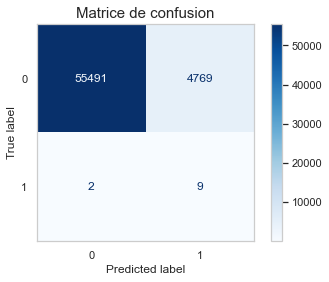

In [436]:
cm = confusion_matrix(y_pred, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=0)
plt.title('Matrice de confusion', fontsize=15)
plt.grid()
plt.show()

# <font color='blue'/>**Modèle XGBoost**

---

Définir X et y

In [3]:
df_train1 = pd.read_csv("df_train1.csv")
df_train1 = reduce_mem_usage(df_train1)

Memory usage of dataframe is 1345.00 MB
Memory usage after optimization is: 415.00 MB
Decreased by 69.1%


In [4]:
X = df_train1.iloc[ :, 2:]
y = df_train1.iloc[ :,1]

Splitter les données en train et test

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0,shuffle=df_train1['TARGET'])

Nombre de valeurs manquentes

In [77]:
print('Missing: %d' % sum(df_train1.isna().sum()))

Missing: 0


Créer l'objet XGBClassifier

In [39]:
xgb_clf = XGBClassifier(
#                         learning_rate =0.01,
#                         n_estimators=500,
#                         max_depth=4,
#                         min_child_weight=4,
#                         subsample=0.8,
#                         colsample_bytree=0.8,
#                         objective= 'binary:logistic',
#                         nthread=4,
#                         scale_pos_weight=2,
#                         seed=27

n_estimators = 1000, max_depth = 3, learning_rate = 0.1, n_jobs = -1, random_state = 59)

# xgb_clf = Pipeline([
#                  ("transform" , preprocessor),
#                  ("xgb_clf",XGBClassifier())
#                  ])

Entraîner le modèle

In [40]:
xgb_clf.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:35:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=59,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
pk.dump(xgb_clf, open("xgb_clf.pkl","wb"))

Tester le modèle sur les données test et train

In [42]:
print('Score test    : ', xgb_clf.score(X_test, y_test))
print('Score train   : ', xgb_clf.score(X_train, y_train))

Score test    :  0.9217368220205405
Score train   :  0.9238685431988154


Afficher les caractéristiques les plus importantes :

In [82]:
# plot feature importance

# plot_importance(xgb_clf)
# plt.show()

In [10]:
prediction = xgb_clf.predict_proba(X_test)
prediction

array([[0.79179865, 0.20820136],
       [0.87405604, 0.12594397],
       [0.7476289 , 0.25237107],
       ...,
       [0.8321465 , 0.16785344],
       [0.63189125, 0.36810878],
       [0.94919384, 0.05080616]], dtype=float32)

In [106]:
# # Fonction pour minimiser le risque de défaut de paiement sur les prédictions
# def min_risk(doc):
#     tab = []
#     idx,l = zip(*doc)
#     for i in range(len(l)):
#         if(l[i]>0.171):
#             tab.append(1)
#         else:
#             tab.append(0)
#     return tab
# y_pred = min_risk(prediction)

In [126]:
# y_pred = xgb_clf.predict(X_test)
y_pred = xgb_clf.predict_proba(X_test)

Matrice de confusion - vérifier l'exactitude

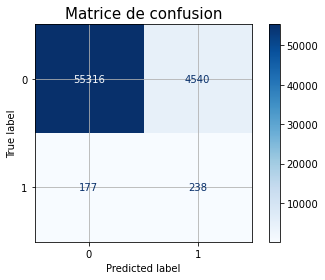

In [154]:
y_pred_predict = xgb_clf.predict(X_test)
cm = confusion_matrix(y_pred_predict, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=0)
plt.title('Matrice de confusion', fontsize=15)
plt.grid()
plt.show()

<AxesSubplot:>

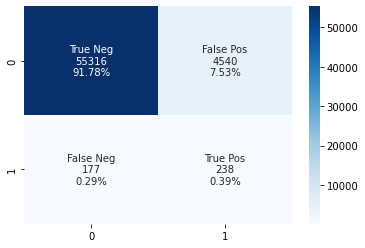

In [129]:
cm = confusion_matrix(np.argmax(y_pred, axis=1), y_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [82]:
# view score
print('XGBClassifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_predict)))
print('XGBClassifier Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, y_pred[:, 1])))
print('XGBClassifier Model F1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_predict)))

XGBClassifier Model accuracy score: 0.9217
XGBClassifier Model ROCAUC score: 0.7847
XGBClassifier Model F1 score: 0.0917


### Seuil optimal pour la courbe ROC

In [215]:
def tune_threshold(true_labels, predicted_probas):
    fpr, tpr, threshold = roc_curve(true_labels, predicted_probas)
    j_stat = tpr - fpr
    index_for_best_threshold = np.argmax(j_stat)

    return threshold[index_for_best_threshold]


def proba_to_class(proba, threshold):
     return np.where(proba >= threshold, 1, 0)

Calculer roc_curve pour obtenir le meilleur seuil

In [216]:
# calculer roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
# Meilleur seuil
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.075490


Graphique ROC pour le modèle avec la classification déséquilibrée avec le seuil optimal

Best Threshold=0.075490, G-Mean=0.715


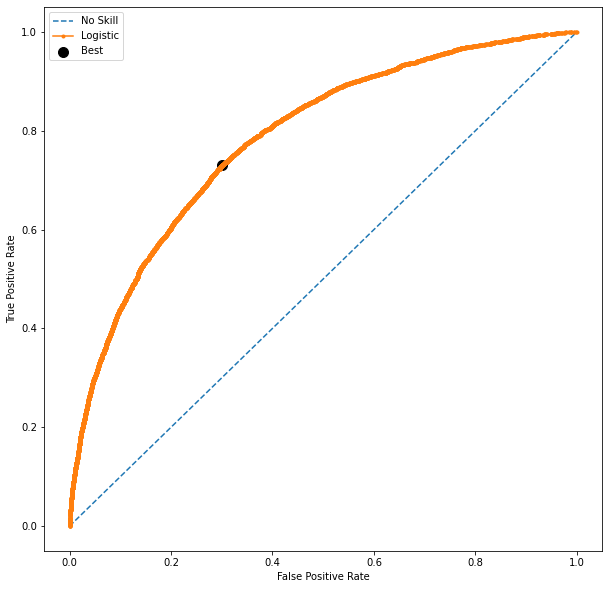

In [211]:
# Garder les probabilités que pour le résultat positif
y_pred_1 = y_pred[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
plt.figure(figsize=(10,10))
# calculer le g-mean pour chaque seuil
gmeans = sqrt(tpr * (1-fpr))
# Identifier l'index la plus grande g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# graphique roc curve du modèle
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best',s=100)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# Afficher le graphique
pyplot.show()

Matrice de confusion

In [212]:
thresh_roc =proba_to_class(y_pred_1, tune_threshold(y_test, y_pred_1))

<AxesSubplot:>

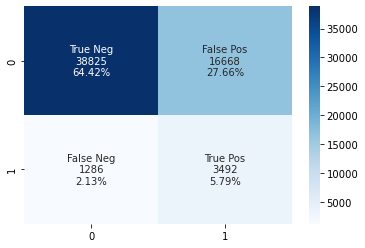

In [213]:
cm = confusion_matrix(y_test,thresh_roc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [225]:
y_test.value_counts()

0    55493
1     4778
Name: TARGET, dtype: int64

In [234]:
pd.DataFrame(thresh_roc).value_counts()

0    40111
1    20160
dtype: int64

Classification Report

In [222]:
print('Classification Report')
print(classification_report(y_test, thresh_roc))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     55493
           1       0.17      0.73      0.28      4778

    accuracy                           0.70     60271
   macro avg       0.57      0.72      0.55     60271
weighted avg       0.90      0.70      0.77     60271



### Seuil optimal pour la courbe de rappel de précision

Définir des seuils

In [180]:
thresholds = arange(0, 1, 0.001)

Fonction pour créer des labels en appliquant le seuil aux probabilités positives

In [181]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

Evaluer chaque seuil

In [182]:
scores = [f1_score(y_test, to_labels(y_pred_1, t)) for t in thresholds]

Obtenir le meilleur seuil

In [183]:
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.171, F-Score=0.33901


Graphique de rappel de précision pour le modèle avec le seuil optimal

Best Threshold=0.170775, F-Score=0.339


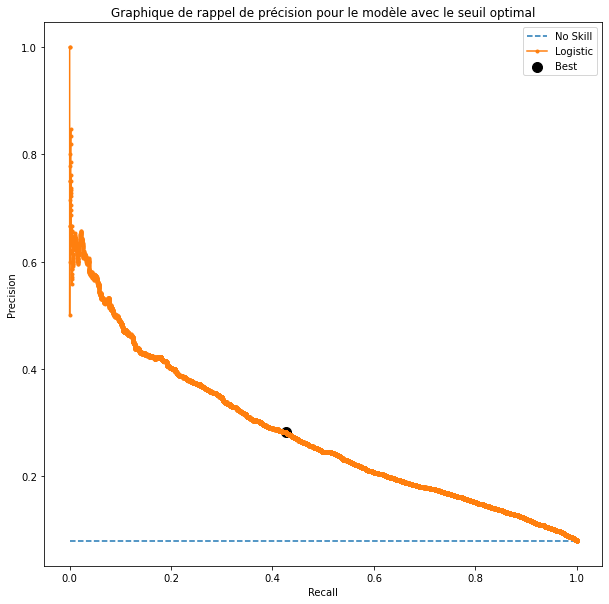

In [188]:
plt.figure(figsize=(10,10))
# Calculer roc curves
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_1)
# convertir en f score
fscore = (2 * precision * recall) / (precision + recall)
# Indentifier l'index du plus grand F-score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# Graphique roc pour le modèle
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best',s=100)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title("Graphique de rappel de précision pour le modèle avec le seuil optimal")
pyplot.legend()
# Afficher le graphique
pyplot.show()

Matrice de confusion

In [197]:
thresh_precision_recall =to_labels(y_pred_1, thresholds[ix])

<AxesSubplot:>

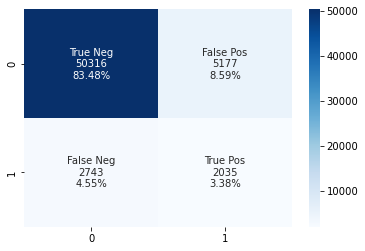

In [203]:
cm = confusion_matrix(y_test, thresh_precision_recall)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

Classification Report

In [199]:
print('Classification Report')
print(classification_report(y_test, thresh_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     55493
           1       0.28      0.43      0.34      4778

    accuracy                           0.87     60271
   macro avg       0.62      0.67      0.63     60271
weighted avg       0.90      0.87      0.88     60271



<Figure size 432x288 with 0 Axes>

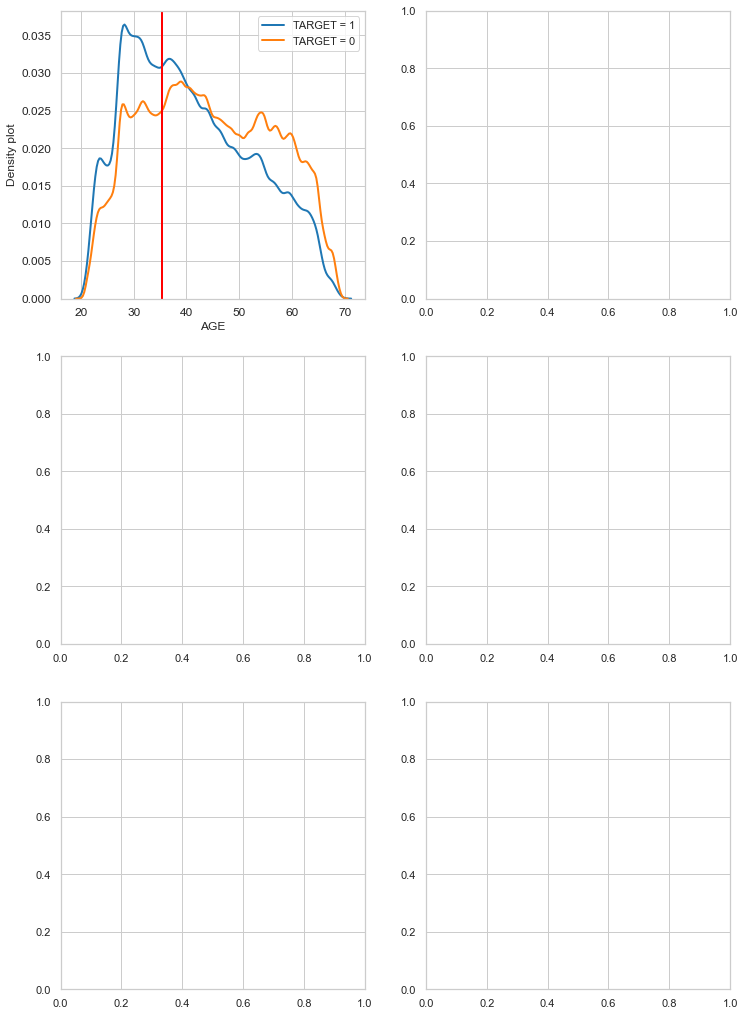

In [437]:
# df_train['AGE'] = abs(np.around(df_train['DAYS_BIRTH']/365,2))
# var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'AMT_CREDIT','AGE','FLAG_OWN_REALTY']
var = ['AGE']
plot_distribution_comp(var,nrow=3)

In [396]:
import plotly.figure_factory as ff

# go.create_distplot(df_train1.loc[df_train1['TARGET'] == 0, source])
# fig = ff.create_distplot(hist_data, group_labels, curve_type='kde')
# fig2 = ff.create_distplot(df_train1.head(10000), group_labels=df_train1['TARGET'].head(10000), curve_type = 'normal')
# normal_x = fig2.df_train1.loc[df_train1['TARGET'] == 0, 'AGE']
# normal_y = fig2.df_train1.loc[df_train1['TARGET'] == 1, 'AGE']
# fig.add_traces(go.Scatter(x=normal_x, y=normal_y, mode = 'lines',
#                           line = dict(color='rgba(0,255,0, 0.6)',
#                                       #dash = 'dash'
#                                       width = 1),
#                           name = 'normal'
#                          ))
# fig.show()

fig = px.density_contour(df_train1.head(10000)[['AGE']], x='AGE')
fig.show()

In [89]:
y_test.value_counts()

0    54906
1     4750
Name: TARGET, dtype: int64

Classification Report

In [90]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     54906
           1       0.45      0.06      0.11      4750

    accuracy                           0.92     59656
   macro avg       0.69      0.53      0.53     59656
weighted avg       0.89      0.92      0.89     59656



Feature Importance

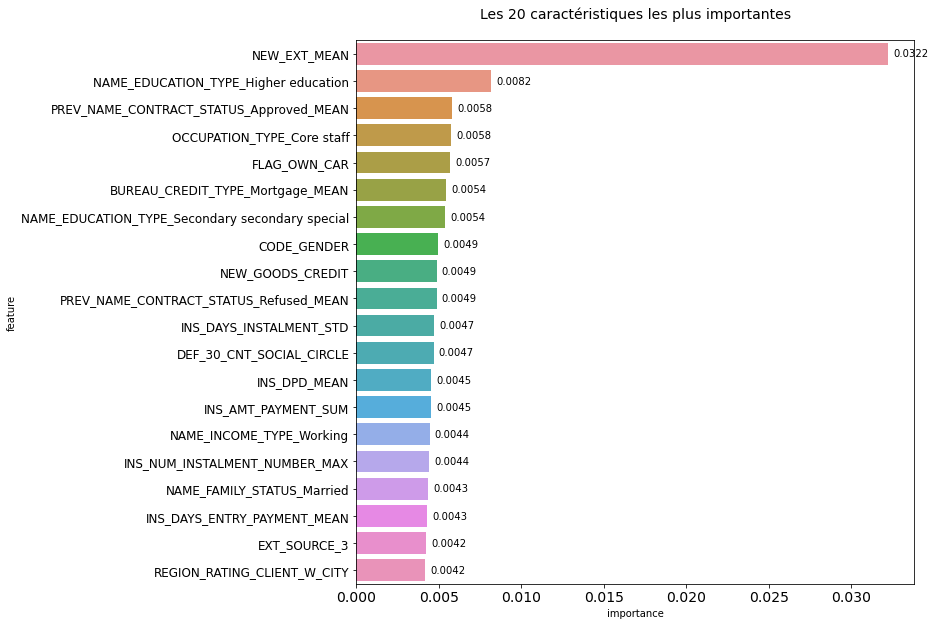

In [91]:
feature_importance_df = pd.DataFrame()
feature_importance_df["feature"] = X_train.columns
feature_importance_df["importance"] = xgb_clf.feature_importances_

feature_importance_df  = feature_importance_df.sort_values('importance', ascending=False).reset_index()
plt.figure(figsize = (10, 10))
ax = sns.barplot(x ='importance', y ='feature', data= feature_importance_df[:20])

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

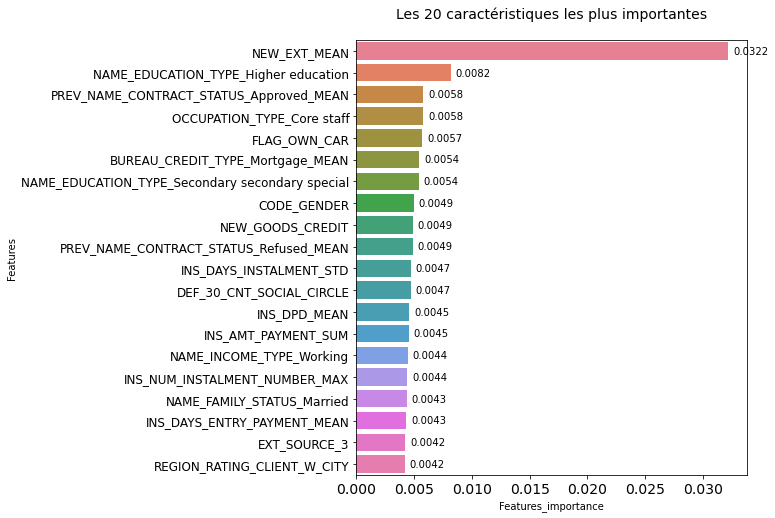

In [92]:
import warnings
# Créer dataframe des caractéristiques les plus importantes
df_feature_importance=pd.DataFrame({'Features': df_train1.iloc[ :, 2:].columns,
              'Features_importance':xgb_clf.feature_importances_
              })

df_feature_importance_20 = df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20)
# df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20).to_csv('df_feature_importance.csv', index = False)

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance", y="Features", data=df_feature_importance_20, palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

SHAP Model interpretation

In [33]:
# Initialize SHAP Tree explainer
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

# Baseline value
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Explainer expected value: -1.7680895328521729


In [34]:
shap.plots.waterfall(shap_values[0])

AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

In [35]:
shap.force_plot(explainer.expected_value, shap_values[0:5,:],X_train.iloc[0:5,:], plot_cmap="DrDb")

In [95]:
shap.force_plot(explainer.expected_value,
                shap_values[7], features=df_train1.iloc[7, 2:],
#                 feature_names=df_train1.columns[0:20],
                show=False,
                # plot_cmap=['#77dd77', '#f99191']
                )

In [96]:
df_train1
df_train1.loc[df_train1.index[4]]
X_train.loc[X_train.index[4]]

NAME_CONTRACT_TYPE                            0.0
CODE_GENDER                                   0.0
FLAG_OWN_CAR                                  0.0
FLAG_OWN_REALTY                               0.0
CNT_CHILDREN                                  0.0
                                            ...  
APPROVED_DAYS_TERMINATION_MIN             -2080.0
APPROVED_DAYS_TERMINATION_MAX             -1814.0
APPROVED_DAYS_TERMINATION_MEAN            -1947.0
APPROVED_DAYS_TERMINATION_MEDIAN          -1947.0
APPROVED_NFLAG_INSURED_ON_APPROVAL_MEAN       0.0
Name: 191147, Length: 583, dtype: float32

100%|===================| 238519/238623 [30:23<00:00]        

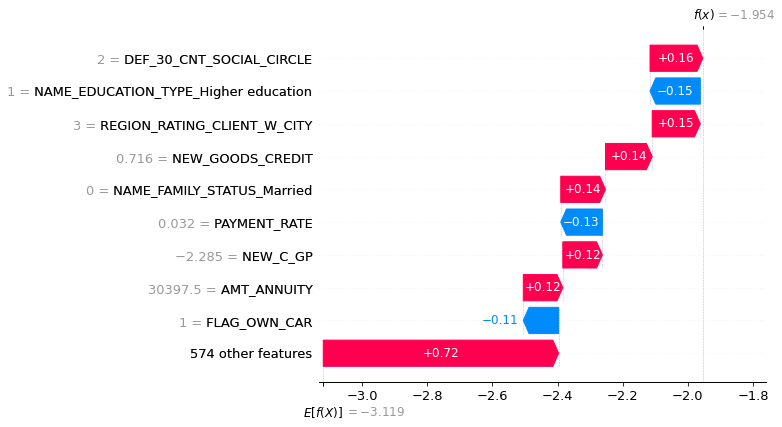

In [97]:
# df_train1[df_train1['SK_ID_CURR'] == 100007]
# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

# # compute SHAP values
# explainer = shap.Explainer(xgb_clf, X_train)
# shap_values = explainer(X_test)

# shap.plots.waterfall(shap_values[0])

Summarize the effects of all the features

In [99]:
# shap.summary_plot(shap_values, X_test)

Extraire les 20 features les plus importantes

In [36]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance.head(20)

,col_name,feature_importance_vals
85,NEW_EXT_MEAN,0.479788
1,CODE_GENDER,0.071041
11,DAYS_EMPLOYED,0.067469
19,EXT_SOURCE_3,0.065143
86,NEW_GOODS_CREDIT,0.061108
42,NAME_EDUCATION_TYPE_Higher education,0.057679
18,EXT_SOURCE_2,0.038725
84,PAYMENT_RATE,0.036543
7,AMT_ANNUITY,0.035854
419,PREV_NAME_CONTRACT_STATUS_Refused_MEAN,0.034429


In [37]:
col_feature_importance = feature_importance['col_name'].head(20).values
col_feature_importance

array(['NEW_EXT_MEAN', 'CODE_GENDER', 'DAYS_EMPLOYED', 'EXT_SOURCE_3',
       'NEW_GOODS_CREDIT', 'NAME_EDUCATION_TYPE_Higher education',
       'EXT_SOURCE_2', 'PAYMENT_RATE', 'AMT_ANNUITY',
       'PREV_NAME_CONTRACT_STATUS_Refused_MEAN', 'INS_AMT_PAYMENT_MIN',
       'INS_DPD_STD', 'INS_DPD_MEAN', 'INS_AMT_PAYMENT_SUM',
       'INS_DAYS_INSTALMENT_STD', 'PREV_CNT_PAYMENT_STD',
       'PREV_DAYS_LAST_DUE_1ST_VERSION_MAX', 'DAYS_BIRTH',
       'NAME_INCOME_TYPE_Working', 'INS_PAYMENT_PERC_MEAN'], dtype=object)

Définir les meilleurs hyperparamètres avec GridSearchCV

In [14]:
param_grid = {
            'n_estimators': [100, 200, 300, 400, 500, 600],
            'max_depth': [2, 5, 10, 15, 20, 25, 30, 35, 40],
            'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]
              }

grid  = GridSearchCV(xgb_clf, param_grid, cv=5)
grid.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[06:16:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[06:17:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[06:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[06:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[06:21:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[06:22:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[06:41:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[06:58:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[07:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[07:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[07:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[07:54:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[07:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[07:59:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[08:02:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[08:05:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[08:45:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[09:25:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[10:06:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[10:46:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[11:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

GridSearchCV : Le modèle avec le meilleur score

In [ ]:
grid.best_score_

GridSearchCV : Les meilleurs hyperparamètres utilisés

In [ ]:
grid.best_params_

GridSearchCV : Enregistrerle meilleur modèle

In [ ]:
model_grid = grid.best_estimator_

Tester le modèle GridSearchCV sur les données test et train

In [ ]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Prédiction sur l'échantillon test

In [ ]:
y_pred = model_grid.predict(X_test)

Ci-dessous le graphique de valeurs test et les valeurs prédites :

In [ ]:
fig = plt.subplots(figsize=(8,7))

x_ax = range(len(y_test))

plt.scatter(x_ax, y_test, label='True values')
plt.scatter(x_ax, y_pred, label='Predict values')

plt.legend()
plt.show()

Matrice de confusion

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Matrice de confusion - vérifier l'exactitude

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=0)
plt.title('Matrice de confusion', fontsize=15)
plt.grid()
plt.show()

# <font color='blue'/>**Modèle XGBoost - features importance**

---

Définir X et y

In [ ]:
# df_train1 = pd.read_csv("df_train1.csv")

In [ ]:
X = df_train1[col_feature_importance]
y = df_train1.iloc[ :,1]

Splitter les données en train et test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0,shuffle=df_train1['TARGET'])

Nombre de valeurs manquentes

In [ ]:
print('Missing: %d' % sum(df_train1.isna().sum()))

Créer l'objet XGBClassifier

In [ ]:
xgb_clf = XGBClassifier()

# xgb_clf = Pipeline([
#                  ("transform" , preprocessor),
#                  ("xgb_clf",XGBClassifier())
#                  ])

Entraîner le modèle

In [ ]:
xgb_clf.fit(X_train, y_train)

In [ ]:
# pk.dump(xgb_clf, open("xgb_clf.pkl","wb"))

Tester le modèle sur les données test et train

In [ ]:
print('Score test    : ', xgb_clf.score(X_test, y_test))
print('Score train   : ', xgb_clf.score(X_train, y_train))

Afficher les caractéristiques les plus importantes :

In [ ]:
# plot feature importance

# plot_importance(xgb_clf)
# plt.show()

In [ ]:
prediction = xgb_clf.predict_proba(X_test)
prediction

In [ ]:
# Fonction pour minimiser le risque de défaut de paiement sur les prédictions
def min_risk(doc):
    tab = []
    idx,l = zip(*doc)
    for i in range(len(l)):
        if(l[i]>0.4):
            tab.append(1)
        else:
            tab.append(0)
    return tab
y_pred = min_risk(prediction)

In [ ]:
y_pred = xgb_clf.predict(X_test)

Matrice de confusion - vérifier l'exactitude

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=0)
plt.title('Matrice de confusion', fontsize=15)
plt.grid()
plt.show()

In [ ]:
y_test.value_counts()

Classification Report

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Feature Importance

In [ ]:
feature_importance_df = pd.DataFrame()
feature_importance_df["feature"] = X_train.columns
feature_importance_df["importance"] = xgb_clf.feature_importances_

feature_importance_df  = feature_importance_df.sort_values('importance', ascending=False).reset_index()
plt.figure(figsize = (10, 10))
ax = sns.barplot(x ='importance', y ='feature', data= feature_importance_df[:20])

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

SHAP Model interpretation

In [ ]:
# Initialize SHAP Tree explainer
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

# Baseline value
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0:5,:],X_train.iloc[0:5,:], plot_cmap="DrDb")

In [ ]:
shap.force_plot(explainer.expected_value,
                shap_values[7], features=X_train.iloc[7, :],
#                 feature_names=df_train1.columns[0:20],
                show=False,
                # plot_cmap=['#77dd77', '#f99191']
                )

In [ ]:
# df_train1[df_train1['SK_ID_CURR'] == 100007]
# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

# compute SHAP values
explainer = shap.Explainer(xgb_clf, X_train)
shap_values = explainer(X_train)

shap.plots.waterfall(shap_values[0])

Summarize the effects of all the features

In [ ]:
shap.summary_plot(shap_values, X_train)

# <font color='blue'/>**Modèle LightGBM**

---

In [23]:
X = df_train1.iloc[ :, 2:]
y = df_train1.iloc[ :,1]

In [424]:
df_train1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'APPROVED_DAYS_LAST_DUE_MIN', 'APPROVED_DAYS_LAST_DUE_MAX',
       'APPROVED_DAYS_LAST_DUE_MEAN', 'APPROVED_DAYS_LAST_DUE_MEDIAN',
       'APPROVED_DAYS_TERMINATION_MIN', 'APPROVED_DAYS_TERMINATION_MAX',
       'APPROVED_DAYS_TERMINATION_MEAN', 'APPROVED_DAYS_TERMINATION_MEDIAN',
       'APPROVED_NFLAG_INSURED_ON_APPROVAL_MEAN', 'AGE'],
      dtype='object', length=586)

Splitter les données en train et test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10,shuffle=df_train1['TARGET'])

In [25]:
import lightgbm as lgbm
lgbm_clf = lgbm.LGBMClassifier()

In [26]:
lgbm_clf.fit(X_train, y_train)

LGBMClassifier()

In [27]:
# pk.dump(lgbm_clf, open("lgbm_clf.pkl","wb"))

In [428]:
# df_train.head(2000).to_csv('db/df_train_2000.csv', index = False)
# df_train1.head(2000).to_csv('db/df_train1_2000.csv', index = False)

Prédire le résultat sur les données test

In [ ]:
y_pred=lgbm_clf.predict(X_test)
# y_pred=lgbm_clf.predict_proba(X_test)

In [21]:
# view score
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('LightGBM Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, lgbm_clf)))
print('LightGBM Model F1 score: {0:0.4f}'.format(f1_score(y_test, lgbm_clf)))

LightGBM Model accuracy score: 0.9205


NameError: name 'roc_auc_score' is not defined

In [20]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     55493
           1       0.49      0.05      0.09      4778

    accuracy                           0.92     60271
   macro avg       0.71      0.52      0.52     60271
weighted avg       0.89      0.92      0.89     60271



Définir les meilleurs hyperparamètres avec GridSearchCV

Matrice de confusion - vérifier l'exactitude

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=0)
plt.title('Matrice de confusion', fontsize=15)
plt.grid()
plt.show()

Feature Importance

In [ ]:
import warnings

feature_importance_df = pd.DataFrame()
feature_importance_df["feature"] = X_train.columns
feature_importance_df["importance"] = lgbm_clf.feature_importances_

feature_importance_df  = feature_importance_df.sort_values('importance', ascending=False).reset_index()
plt.figure(figsize = (10, 10))
ax = sns.barplot(x ='importance', y ='feature', data= feature_importance_df[:20])

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
feature_importance_df['feature'].head(30).values

SHAP Model interpretation

In [ ]:
# Initialize SHAP Tree explainer
explainer = shap.TreeExplainer(lgbm_clf, model_output='raw')
shap_values = explainer.shap_values(X_test)

# Baseline value
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

Résumez les impacts de toutes les features

In [ ]:
shap.summary_plot(shap_values, X_test)

Diagramme de décision

Les diagrammes de décision offrent une vue détaillée du fonctionnement interne d'un modèle ; c'est-à-dire qu'ils montrent comment les modèles prennent des décisions.

Il existe plusieurs cas d'utilisation d'un diagramme de décision.

1) Affichez clairement un grand nombre d'effets de fonctionnalités.

2) Visualisez les prédictions à sorties multiples.

3) Afficher l'effet cumulatif des interactions.

4) Explorez les effets de fonctionnalité pour une plage de valeurs de fonctionnalité.

5) Identifier les valeurs aberrantes.

6) Identifier les chemins de prédiction typiques.

7) Comparez et contrastez les prédictions de plusieurs modèles.

In [ ]:
row = 30
# pred = lgbm_clf.predict_proba(X_test.iloc[row].values.reshape(1, -1))
# print(f"Actutal Outcome is {y_test.iloc[row]}")
# print(f"Predicted Outcome is {np.argmax(pred)}")

shap.decision_plot(base_value = expected_value, 
                   shap_values=shap_values[0][row], 
                   features = X_test, 
                   feature_names=X_test.columns.tolist(),
                   link='logit')

In [ ]:
shap.decision_plot(expected_value, shap_values[0][20], X_test.columns.tolist(), link='logit')

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0][20],X_train.iloc[0,:])

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][20],X_train.iloc[0,:])

**Suréchantillonnage aléatoire**

Le suréchantillonnage peut être défini comme l'ajout de plus de copies à la classe minoritaire. Le suréchantillonnage peut être un bon choix lorsque vous n'avez pas une tonne de données avec lesquelles travailler.

Un inconvénient à prendre en compte lors du sous-échantillonnage est qu'il peut entraîner un surajustement et une mauvaise généralisation de votre ensemble de test.

## Méthode 1 : SMOTE

In [18]:
X = df_train1.iloc[ :, 2:]
y = df_train1.iloc[ :,1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10,shuffle=df_train1['TARGET'])

In [20]:
smote = SMOTE(sampling_strategy='minority')

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)

y_smote.value_counts()

0    221911
1    221911
Name: TARGET, dtype: int64

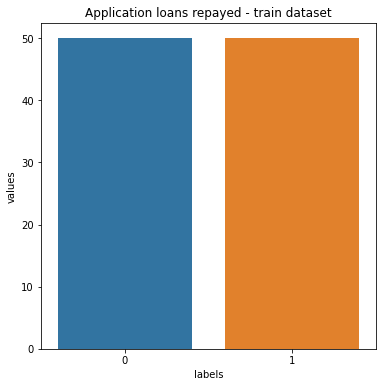

In [21]:
temp = y_smote.value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': (temp.values/temp.sum())*100
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
ax = sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()

## Ajouter les annotations sur les barres
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy()
#     plt.annotate("%.2f" % p.get_height() + '%',
#                 (p.get_x()+p.get_width()/2, p.get_height()),
#                 ha='center',
#                 va='center',
#                 xytext=(0, 8),
#                 textcoords='offset points',
#                 fontsize = 10,
#                 )
# plt.show()

In [22]:
import lightgbm as lgbm
lgbm_clf = lgbm.LGBMClassifier(nthread=4,
                               n_estimators=500,
                               learning_rate=0.01,
                               num_leaves=40,
                               colsample_bytree=0.9497036,
                               subsample=0.8715623,
                               max_depth=8,
                               reg_alpha=0.041545473,
                               reg_lambda=0.0735294,
                               min_split_gain=0.0222415,
                               min_child_weight=39.3259775,
                               silent=-1,
                               verbose=-1
                              )

In [23]:
lgbm_clf.fit(x_smote, y_smote)

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


LGBMClassifier(colsample_bytree=0.9497036, learning_rate=0.01, max_depth=8,
               min_child_weight=39.3259775, min_split_gain=0.0222415,
               n_estimators=500, nthread=4, num_leaves=40,
               reg_alpha=0.041545473, reg_lambda=0.0735294, silent=-1,
               subsample=0.8715623, verbose=-1)

Prédire le résultat sur les données X_test

In [24]:
y_pred=lgbm_clf.predict(X_test)
# y_pred=lgbm_clf.predict_proba(X_test)

In [25]:
# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9154


<AxesSubplot:>

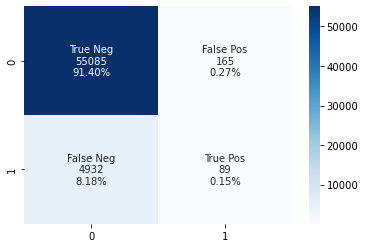

In [26]:
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [27]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     55250
           1       0.35      0.02      0.03      5021

    accuracy                           0.92     60271
   macro avg       0.63      0.51      0.49     60271
weighted avg       0.87      0.92      0.88     60271



## Méthode 2 : Oversampling

In [28]:
# nombre de classes
target_count_0, target_count_1 = df_train1['TARGET'].value_counts()

# Classe séparée
target_0 = df_train1[df_train1['TARGET'] == 0]
target_1 = df_train1[df_train1['TARGET'] == 1] # affiche la forme de la classe
print('target 0 :', target_0.shape)
print('target 1 :', target_1.shape)

target 0 : (277161, 585)
target 1 : (24193, 585)


In [29]:
# Oversample 1-class and concat the DataFrames of both classes
# class_1_over = target_1.sample(int(target_count_0/3), replace=True)
class_1_over = target_1.sample(target_count_0, replace=True)
test_over = pd.concat([target_0, class_1_over], axis=0)

print('Random over-sampling:')
print(test_over.TARGET.value_counts(normalize=True))

Random over-sampling:
0    0.5
1    0.5
Name: TARGET, dtype: float64


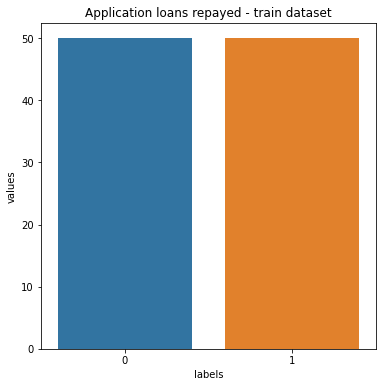

In [30]:
temp = test_over['TARGET'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': (temp.values/temp.sum())*100
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
ax = sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()

In [31]:
X = test_over.iloc[ :, 2:]
y = test_over.iloc[ :,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [32]:
import lightgbm as lgbm
lgbm_clf = lgbm.LGBMClassifier()

# lgbm_clf = lgbm.LGBMClassifier(nthread=4,
#                                n_estimators=500,
#                                learning_rate=0.01,
#                                num_leaves=40,
#                                colsample_bytree=0.9497036,
#                                subsample=0.8715623,
#                                max_depth=8,
#                                reg_alpha=0.041545473,
#                                reg_lambda=0.0735294,
#                                min_split_gain=0.0222415,
#                                min_child_weight=39.3259775,
#                                silent=-1,
#                                verbose=-1
#                               )

In [33]:
lgbm_clf.fit(X_train, y_train)

LGBMClassifier()

Prédire le résultat sur les données X_test

In [34]:
y_pred=lgbm_clf.predict(X_test)
# y_pred=lgbm_clf.predict_proba(X_test)

In [35]:
# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.7411


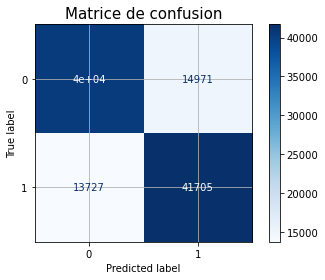

In [36]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=0)
plt.title('Matrice de confusion', fontsize=15)
plt.grid()
plt.show()

In [37]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.73      0.74     55433
           1       0.74      0.75      0.74     55432

    accuracy                           0.74    110865
   macro avg       0.74      0.74      0.74    110865
weighted avg       0.74      0.74      0.74    110865



## Méthode 3 : Undersampling

In [38]:
# Undersample 0-class and concat the DataFrames of both class
target_0_under = target_0.sample(target_count_1)
test_under = pd.concat([target_0_under, target_1], axis=0)

print('Random under-sampling:')
print(test_under.TARGET.value_counts())

Random under-sampling:
0    24193
1    24193
Name: TARGET, dtype: int64


In [39]:
X = test_under.iloc[ :, 2:]
y = test_under.iloc[ :,1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [40]:
# Number of classes in training Data
y_train.value_counts()

0    19354
1    19354
Name: TARGET, dtype: int64

In [41]:
import lightgbm as lgbm
# lgbm_clf = lgbm.LGBMClassifier()

lgbm_clf = lgbm.LGBMClassifier(nthread=4,
                               n_estimators=500,
                               learning_rate=0.01,
                               num_leaves=40,
                               colsample_bytree=0.9497036,
                               subsample=0.8715623,
                               max_depth=8,
                               reg_alpha=0.041545473,
                               reg_lambda=0.0735294,
                               min_split_gain=0.0222415,
                               min_child_weight=39.3259775,
                               silent=-1,
                               verbose=-1
                              )

In [42]:
lgbm_clf.fit(X_train, y_train)

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


LGBMClassifier(colsample_bytree=0.9497036, learning_rate=0.01, max_depth=8,
               min_child_weight=39.3259775, min_split_gain=0.0222415,
               n_estimators=500, nthread=4, num_leaves=40,
               reg_alpha=0.041545473, reg_lambda=0.0735294, silent=-1,
               subsample=0.8715623, verbose=-1)

In [43]:
# pk.dump(lgbm_clf, open("lgbm_clf.pkl","wb"))

Prédire le résultat sur les données X_test

In [44]:
y_pred=lgbm_clf.predict(X_test)
# y_pred=lgbm_clf.predict_proba(X_test)

In [45]:
# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.7037


<AxesSubplot:>

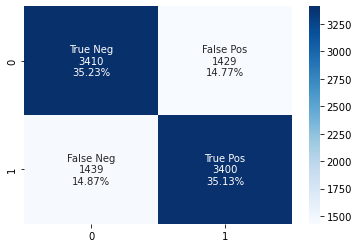

In [52]:
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [47]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      4839
           1       0.70      0.70      0.70      4839

    accuracy                           0.70      9678
   macro avg       0.70      0.70      0.70      9678
weighted avg       0.70      0.70      0.70      9678



In [48]:
# Initialize SHAP Tree explainer
explainer = shap.TreeExplainer(lgbm_clf, model_output='raw')
shap_values = explainer.shap_values(X_test)

# Baseline value
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

Explainer expected value: -0.0016575103580462982


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


Summarize the effects of all the features

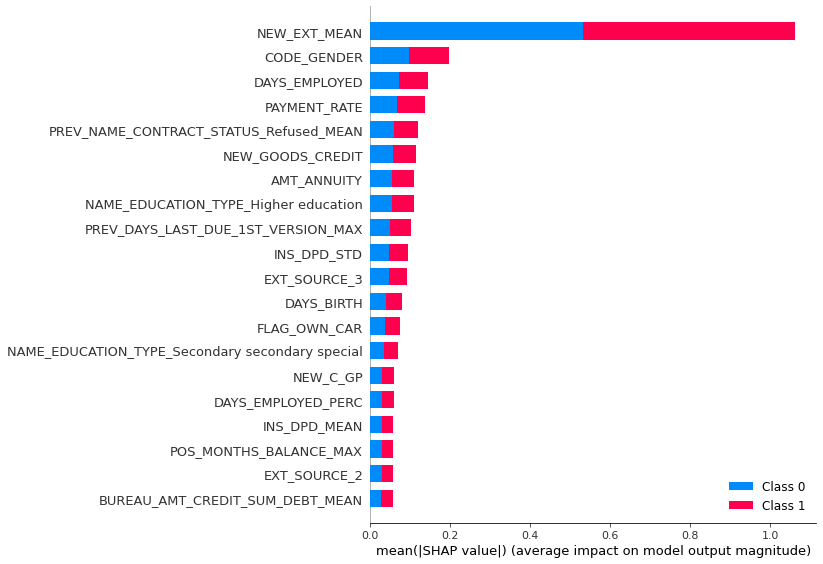

In [49]:
shap.summary_plot(shap_values, X_test)